#🐶 AI Hound: Embedding Data and Visualizing It in an Interface 🔍

## Motivation and Background
Imagine you're a journalist on the hunt for the next big story—a topic buzzing in academia and online, yet untouched by mainstream media. A hidden gem waiting to be unearthed!

To discover this gem, you need to sift through a mountain of data from various sources, comparing trends in academic research and online discussions (let's focus on Reddit for simplicity). Your goal? Identify the hot topics that have slipped through the cracks of news coverage.

How can we use AI to help with this process? In this tutorial, we'll walk you through our code, showcasing how AI visualization can reveal these hidden insights and spark creative applications.



Leveraging the power of AI Retrieval-Augmented Generation (RAG), embeddings, and interactive visualization, this tool will help journalists:
- 🔎 Identify new stories
- ✅ Validate sources
- 📊 Visualize data to support their hypotheses

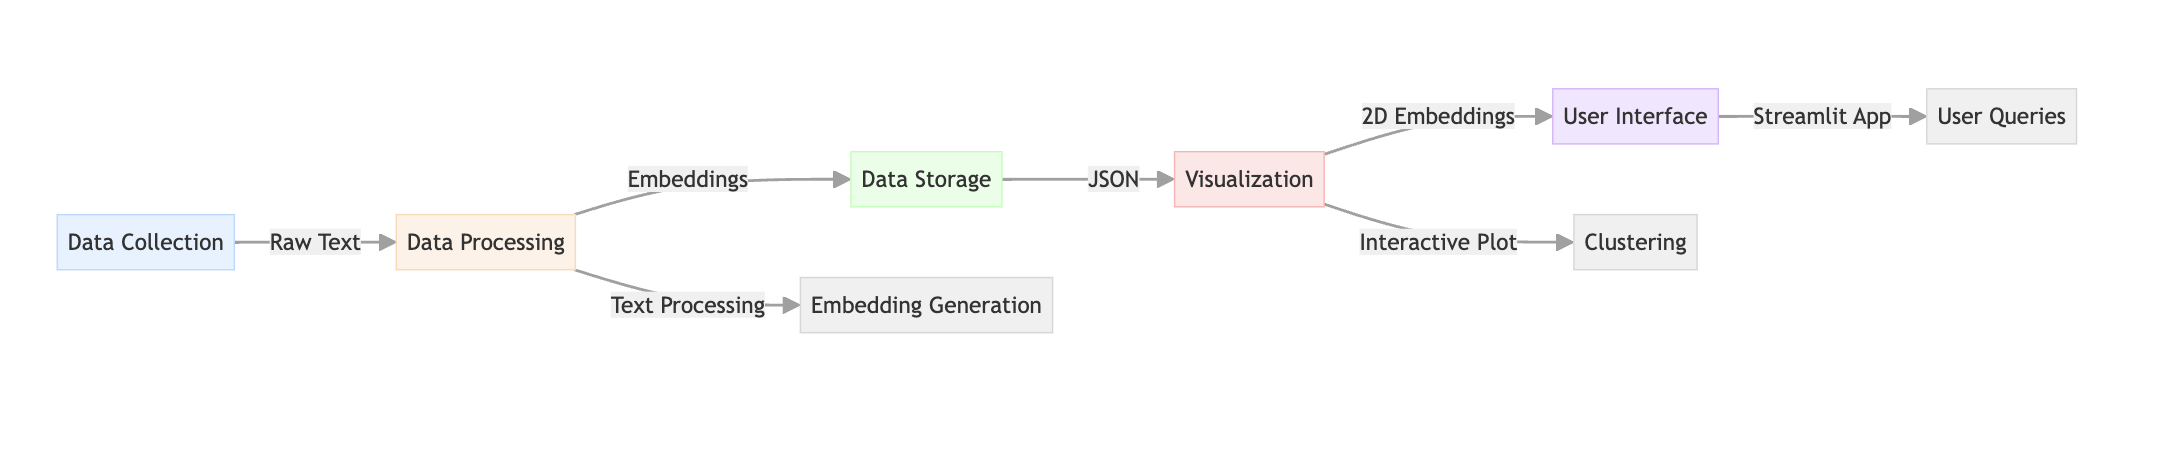

### 🚀 Benefits for Developers

By following this tutorial, you'll gain:
- 🧠 Deep understanding of key AI concepts
- 👨‍💻 Practical, hands-on experience in applying AI techniques
- 🔍 Solid grasp of AI RAG, combining retrieval-based and generation-based approaches
- 🧮 Expertise in embeddings for natural language processing
- 📈 Skills in creating interactive visualizations

By the end of this tutorial, you'll have developed a valuable tool for journalists and enhanced your AI development skills, equipping you to tackle similar projects in the future.

## 🚀 Project Overview

1. 📊 Data Collection and Processing
   - 🤖 Reddit API: Fetch posts and comments on AI and future of work
   - 📰 MediaStack API: Retrieve news articles on AI and work-related topics
   - 🎓 arXiv API: Gather scientific papers on AI's impact on work

2. 🧹 Text Preprocessing and Embedding Generation
   - 🔗 Combine titles and texts from different sources
   - 🧼 Preprocess text (tokenize, remove stopwords, lowercase)
   - 🧠 Generate embeddings using TF-IDF and/or Sentence Transformers

3. 🎨 Visualization Preparation
   - 🗺️ Use UMAP for dimensionality reduction
   - 🧩 Apply K-means clustering to group similar documents

4. 🖥️ Interactive Visualization (Streamlit app)
   - 📊 Create interactive scatter plot with Bokeh
   - 🔵🟢🔴 Represent document types with different shapes/colors
   - 🍯 Implement hexbin plotting for density visualization
   - ℹ️ Add hover tooltips for additional information

5. 🏆 Scoring System
   - 🌳 Use KD-Tree for efficient nearest neighbor searches
   - 📈 Calculate scores based on nearby documents

6. 🎛️ User Interface and Interactivity
   - 🔀 Provide options to select research categories and adjust visualization
   - 📝 Implement feedback form for user input

7. 🛠️ Utility Functions
   - 🔄 Convert coordinates between axial and Cartesian systems for hexagonal binning

Let's dive in and start building this exciting AI News Hound tool! 💪🚀

## Reddit API Function

  This function, `search_reddit_posts`, allows us to search Reddit for posts related to a specific query and retrieve detailed information about each post. Here's a breakdown of how it works:

  1. **API Setup**:
    - We use the `praw` library to interact with the Reddit API.
    - The function requires Reddit API credentials (client ID, client secret, and user agent) which you need to obtain from Reddit's developer portal.

  2. **Search Functionality**:
    - The function searches across all subreddits using the provided query.
    - It limits the number of results based on the `limit` parameter.

  3. **Data Extraction**:
    - For each post, we extract various pieces of information:
      - Title, author, creation time, score, text content, URL, number of comments, and subreddit.
    - We also fetch the top-level comments for each post.

  4. **Comment Handling**:
    - The `replace_more(limit=0)` call ensures we only get the readily available comments without loading additional comment trees.
    - We limit the comments to top-level ones (direct replies to the post) and cap it at 5 comments per post to manage data volume.

  5. **Data Structure**:
    - The information for each post is stored in a dictionary.
    - These dictionaries are collected into a list, which is the function's return value.

  6. **Usage Example**:
    - The example shows how to call the function with a sample query.
    - It demonstrates printing the results and optionally saving them to a JSON file.

  7. **Customization**:
    - You can adjust the `limit` parameter to control how many posts to retrieve.
    - Modify the post_info dictionary to include or exclude specific data points as needed for your analysis.

  This function provides a foundation for gathering Reddit data related to AI and the future of work, which can be further processed and analyzed in your project.

  
  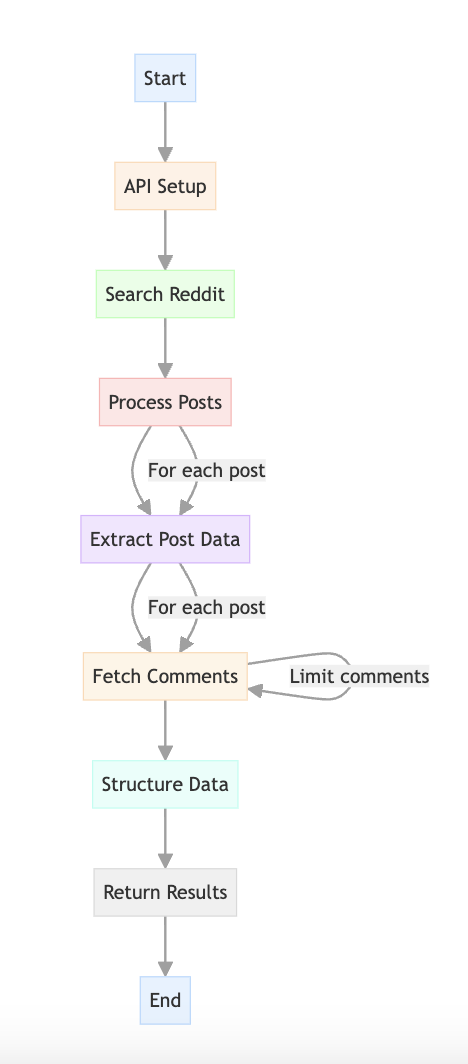

In [ ]:
import praw
import json
from typing import List, Dict

def search_reddit_posts(query: str, limit: int = 10) -> List[Dict]:
    """
    Search Reddit for posts related to a specific query and retrieve their details along with comments.

    Args:
    query (str): The search query string.
    limit (int): Maximum number of posts to retrieve (default is 10).

    Returns:
    List[Dict]: A list of dictionaries containing post information.

    Each dictionary in the returned list contains:
    - title: The title of the post
    - text: Combined text of the post and top-level comments
    - type: Always set to 'reddit'
    - link: URL of the post
    """

    # Initialize the Reddit API client
    # Replace these with your own Reddit app credentials
    reddit = praw.Reddit(
        client_id="YOUR_CLIENT_ID",
        client_secret="YOUR_CLIENT_SECRET",
        user_agent="YOUR_USER_AGENT"
    )

    # Perform the search query
    search_results = reddit.subreddit('all').search(query, limit=limit)

    posts = []
    for post in search_results:
        # Access the full submission to get comments
        submission = reddit.submission(id=post.id)

        # Limit the number of comments to load (to avoid hitting API limits)
        submission.comments.replace_more(limit=0)

        # Combine post text and comments
        comments = [post.selftext]  # Start with the post's own text
        for top_level_comment in submission.comments.list():
            comments.append(top_level_comment.body)

        # Create a dictionary with post information
        post_info = {
            'title': post.title,
            'text': '\n Comment: '.join(comments),
            'type': 'reddit',
            'link': post.url,
        }

        posts.append(post_info)

    return posts

# Example usage:
query = "AI future of work"
results = search_reddit_posts(query, limit=5)

# Print the results
for post in results:
    print(f"Title: {post['title']}")
    print(f"Link: {post['link']}")
    print(f"Text preview: {post['text'][:100]}...")  # Show first 100 characters
    print("-" * 50)

### Combining Sources from Different JSON Files

The `combine_sources` function is designed to aggregate data from multiple JSON files containing information from various sources such as news articles, Reddit posts, and scientific papers. Here's a breakdown of how it works:

1. **Function Definition**:
   - The function takes a `directory` path as input where the JSON files are stored.
   - It returns a list of dictionaries, each representing a single document with standardized fields.

2. **Iterating Through Files**:
   - The function uses `os.listdir()` to get all files in the specified directory.
   - It filters for JSON files using the `.endswith('.json')` check.

3. **Determining Source Type**:
   - Based on the filename, the function assigns a `source_type` (article, reddit, or paper).
   - This helps in categorizing the data for later analysis.

4. **Reading and Processing JSON Files**:
   - Each JSON file is opened and its contents are loaded using `json.load()`.
   - The function iterates through each item in the loaded data.

5. **Standardizing Data Structure**:
   - For each item, a new dictionary is created with standardized keys:
     - 'title': The title of the document
     - 'text': The main content of the document
     - 'source': Either the source or link of the document
     - 'type': The determined source type

6. **Combining Data**:
   - All processed items are appended to the `combined_data` list.

7. **Return Value**:
   - The function returns the `combined_data` list containing all processed documents.

This function is crucial for the data preparation phase of our project. It allows us to:
- Consolidate data from multiple sources into a single, uniform format.
- Easily process and analyze data from different origins (articles, Reddit, papers) together.
- Prepare the data for further steps like text preprocessing and embedding generation.

By using this function, we create a unified dataset that can be used for various analyses, such as identifying trends across different types of sources or comparing discussions in academic papers versus social media.

In [ ]:
# Import necessary libraries
import json
import os
from typing import List, Dict

def combine_sources(directory: str) -> List[Dict[str, str]]:
    """
    Combine titles and texts from different source files in a given directory.

    Args:
    directory (str): Path to the directory containing JSON files with source data.

    Returns:
    List[Dict[str, str]]: A list of dictionaries, each containing 'title', 'text', 'source', and 'type' for each document.
    """
    combined_data = []

    # Iterate through all files in the specified directory
    for filename in os.listdir(directory):
        if filename.endswith('.json'):
            file_path = os.path.join(directory, filename)

            # Determine the type of source based on the filename
            if 'articles' in filename:
                source_type = 'article'
            elif 'reddit' in filename:
                source_type = 'reddit'
            elif 'papers' in filename:
                source_type = 'paper'
            else:
                source_type = 'unknown'

            # Read and process each JSON file
            with open(file_path, 'r') as file:
                data = json.load(file)

                for item in data:
                    combined_item = {
                        'title': item.get('title', ''),
                        'text': item.get('text', ''),
                        'source': item.get('source', '') or item.get('link', ''),
                        'type': source_type
                    }
                    combined_data.append(combined_item)

    return combined_data

# Example usage
directory_path = './documents/'
combined_sources = combine_sources(directory_path)
print(f"Total number of combined sources: {len(combined_sources)}")
print("First item:", combined_sources[0])

### Retrieving News Articles with MediaStack API

The `get_articles` function is designed to fetch news articles from the MediaStack API. This function is particularly useful for gathering recent news about specific topics, such as AI and the future of work. Here's a breakdown of how it works:

1. **Function Parameters:**
   - `api_key`: Your personal MediaStack API key.
   - `keywords`: The search terms to find relevant articles.
   - `languages`: The language(s) of the articles (default is English).
   - `sort`: How to order the results (default is most recent first).
   - `limit`: The maximum number of articles to retrieve.

2. **API Request:**
   - The function constructs a URL for the MediaStack API.
   - It sets up query parameters including the API key, keywords, and other filters.
   - A GET request is sent to the API using the `requests` library.

3. **Error Handling:**
   - The function uses a try-except block to handle potential errors during the API request.
   - If there's an error, it prints a message and returns an empty list.

4. **Processing the Response:**
   - The API response is expected to be in JSON format.
   - The function extracts the 'data' part of the response, which contains the article information.

5. **Return Value:**
   - The function returns a list of dictionaries, where each dictionary represents an article with various attributes like title, source, and URL.

6. **Usage Example:**
   - The example code shows how to call the function with your API key and search keywords.
   - It then prints the title, source, and URL of each retrieved article.

This function is a key component in gathering recent news data for our AI journalism tool. By fetching current articles on AI and work-related topics, we can compare this information with scientific papers and social media discussions to identify potential news stories that are underreported but scientifically significant.

In [ ]:
import requests
import json
from typing import List, Dict

def get_articles(api_key: str, keywords: str, languages: str = 'en', sort: str = 'published_desc', limit: int = 25) -> List[Dict]:
    """
    Retrieve news articles from MediaStack API based on specified parameters.

    Args:
    api_key (str): Your MediaStack API key
    keywords (str): Search keywords for articles
    languages (str): Language code(s) for articles (default: 'en' for English)
    sort (str): Sorting order (default: 'published_desc' for most recent first)
    limit (int): Maximum number of articles to retrieve (default: 25)

    Returns:
    List[Dict]: A list of dictionaries, each containing article information
    """
    # Construct the API URL
    base_url = 'http://api.mediastack.com/v1/news'

    # Set up the query parameters
    params = {
        'access_key': api_key,
        'keywords': keywords,
        'languages': languages,
        'sort': sort,
        'limit': limit,
        'categories': 'technology,business'  # Focus on tech and business news
    }

    try:
        # Make the API request
        response = requests.get(base_url, params=params)
        response.raise_for_status()  # Raise an exception for bad status codes

        # Parse the JSON response
        data = response.json()

        # Extract and return the list of articles
        articles = data['data']

        return articles

    except requests.RequestException as e:
        print(f"Error fetching articles: {e}")
        return []

# Example usage:
api_key = 'YOUR_API_KEY_HERE'
keywords = 'artificial intelligence future of work'

articles = get_articles(api_key, keywords)

# Print the titles of the retrieved articles
for article in articles:
    print(f"Title: {article['title']}")
    print(f"Source: {article['source']}")
    print(f"URL: {article['url']}")
    print('-' * 80)

### Fetching Scientific Papers from arXiv

This function, `get_arxiv_papers`, allows us to retrieve scientific papers from arXiv related to our topic of interest. Here's how it works:

1. **Function Definition**:
   - The function takes two parameters: `query` (the search term) and `max_results` (the maximum number of papers to retrieve).

2. **arXiv Search**:
   - We use the `arxiv` library to create a Search object.
   - The search is sorted by relevance to get the most pertinent results.

3. **Processing Results**:
   - For each paper in the search results, we extract key information:
     - Title
     - Authors
     - Summary (abstract)
     - Link (arXiv ID)
     - Publication date
   - We also add a 'type' field set to "paper" for later identification.

4. **Return Value**:
   - The function returns a list of dictionaries, each representing a paper.

5. **Usage**:
   - We can call this function with a query related to AI's impact on work.
   - The results can be further processed, analyzed, or visualized as needed.

This function is crucial for gathering scientific literature on our topic, forming one part of our multi-source approach to identifying newsworthy AI research topics.

In [ ]:
# Import necessary libraries
import arxiv
import json

def get_arxiv_papers(query, max_results=30):
    """
    Fetch scientific papers from arXiv based on a given query.

    Parameters:
    query (str): The search query to use for finding relevant papers.
    max_results (int): The maximum number of results to return (default is 30).

    Returns:
    list: A list of dictionaries, each containing information about a paper.
    """
    print(f"Searching arXiv for: {query}")

    # Create a search object
    search = arxiv.Search(
        query=query,
        max_results=max_results,
        sort_by=arxiv.SortCriterion.Relevance
    )

    papers = []
    for result in search.results():
        paper = {
            'title': result.title,
            'authors': [author.name for author in result.authors],
            'summary': result.summary,
            'link': result.entry_id,
            'published': result.published.strftime('%Y-%m-%d'),
            'type': "paper"
        }
        papers.append(paper)

    print(f"Found {len(papers)} papers")
    return papers

# Example usage
query = "artificial intelligence impact on work"
ai_papers = get_arxiv_papers(query)

# Display the first paper as an example
print(json.dumps(ai_papers[0], indent=2)),

## Text Preprocessing Function

This function, `preprocess_text()`, is designed to clean and standardize text data. It performs several key operations:

1. **Lowercase Conversion**: Converts all text to lowercase to ensure consistency.

2. **Tokenization**: Breaks the text into individual words or tokens using NLTK's `word_tokenize()` function.

3. **Stopword Removal**: Eliminates common words (like "the", "is", "in") that typically don't carry much meaning in analysis.

4. **Punctuation Removal**: Removes all punctuation marks.

5. **Reconstruction**: Joins the remaining tokens back into a single string.

## Why these steps?

- **Lowercase**: Ensures "Work" and "work" are treated the same.
- **Tokenization**: Allows us to process each word individually.
- **Stopword Removal**: Focuses the analysis on more meaningful words.
- **Punctuation Removal**: Eliminates non-essential characters.

This preprocessing helps in:
- Reducing noise in the text data
- Standardizing the format
- Focusing on the most informative parts of the text

It's particularly useful for tasks like text classification, clustering, or generating embeddings, as it helps to highlight the key content words in each document.

## Note
Remember to run the NLTK downloads (nltk.download()) the first time you use this in a new environment, as they're required for the tokenization and stopwords functionality.

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Download necessary NLTK data (run this once)
nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text):
    """
    Preprocess the input text by tokenizing, removing stopwords,
    converting to lowercase, and removing punctuation.

    Args:
    text (str): The input text to be preprocessed.

    Returns:
    str: The preprocessed text.
    """
    # Convert to lowercase
    text = text.lower()

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stopwords and punctuation
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words and word not in string.punctuation]

    # Join the tokens back into a string
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text

# Example usage
sample_text = "AI will significantly impact the future of work and job markets globally."
preprocessed = preprocess_text(sample_text)
print("Original text:", sample_text)
print("Preprocessed text:", preprocessed)

### Generating Embeddings for Text Data

In this tutorial, we'll explore how to generate embeddings for text data using two popular methods: TF-IDF (Term Frequency-Inverse Document Frequency) and Sentence Transformers. These embeddings are crucial for various natural language processing tasks, including document similarity, clustering, and information retrieval.

## What are embeddings?

Embeddings are dense vector representations of text that capture semantic meaning. They allow us to represent words or documents as points in a high-dimensional space, where similar items are closer together.

## Our approach

We'll create a function that can generate embeddings using either TF-IDF, Sentence Transformers, or both. Here's a breakdown of each method:

1. **TF-IDF Vectorization**:
   - TF-IDF stands for Term Frequency-Inverse Document Frequency.
   - It captures the importance of words in a document relative to a corpus.
   - Good for capturing word importance but doesn't understand context or semantics.

2. **Sentence Transformers**:
   - Uses pre-trained transformer models to generate embeddings.
   - Captures semantic meaning and context.
   - Generally provides better performance for semantic tasks.

## The `generate_embeddings` function

Our function does the following:

1. Takes a list of texts and an embedding method as input.
2. If TF-IDF is selected:
   - Creates a TF-IDF vectorizer with a maximum of 1000 features.
   - Fits and transforms the input texts.
   - Stores the resulting dense array in the embeddings dictionary.
3. If Sentence Transformer is selected:
   - Loads a pre-trained model ('all-MiniLM-L6-v2').
   - Encodes the input texts.
   - Stores the resulting embeddings in the dictionary.
4. Returns the dictionary of embeddings.

## Usage

You can use this function to generate embeddings for your text data, which can then be used for various downstream tasks such as clustering, similarity search, or as input features for machine learning models.

By offering both TF-IDF and Sentence Transformer embeddings, you can compare their performance or use them in combination for your specific task.

Remember, while TF-IDF is faster and simpler, Sentence Transformers often provide more semantically meaningful embeddings, especially for tasks that require understanding of context and meaning beyond just word importance.

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sentence_transformers import SentenceTransformer

def generate_embeddings(texts, method='both'):
    """
    Generate embeddings for a list of texts using TF-IDF and/or Sentence Transformers.

    Parameters:
    texts (list): A list of strings, where each string is a document to be embedded.
    method (str): The embedding method to use. Options are 'tfidf', 'sentence_transformer', or 'both'.

    Returns:
    dict: A dictionary containing the generated embeddings.
    """
    embeddings = {}

    if method in ['tfidf', 'both']:
        # TF-IDF Vectorization
        tfidf_vectorizer = TfidfVectorizer(max_features=1000)
        tfidf_matrix = tfidf_vectorizer.fit_transform(texts)
        embeddings['tfidf'] = tfidf_matrix.toarray()

    if method in ['sentence_transformer', 'both']:
        # Sentence Transformer Embedding
        model = SentenceTransformer('all-MiniLM-L6-v2')
        embeddings['sentence_transformer'] = model.encode(texts)

    return embeddings

# Example usage:
texts = [
    "Artificial intelligence is revolutionizing the workplace.",
    "Machine learning algorithms are becoming increasingly sophisticated.",
    "The future of work will be shaped by AI and automation."
]

embeddings = generate_embeddings(texts, method='both')

print("TF-IDF Embeddings shape:", embeddings['tfidf'].shape)
print("Sentence Transformer Embeddings shape:", embeddings['sentence_transformer'].shape)

## Visualization Preparation

In this section, we prepare our document embeddings for visualization using two main techniques: dimensionality reduction and clustering.

## 1. Dimensionality Reduction with UMAP

We use the UMAP (Uniform Manifold Approximation and Projection) algorithm to reduce our high-dimensional embeddings to 2D representations. This allows us to visualize the relationships between documents in a 2D plot.

The `create_2d_embeddings` function:
- Takes high-dimensional embeddings as input
- Uses UMAP to create a 2D representation
- Parameters like `n_neighbors` and `min_dist` can be adjusted to fine-tune the projection

UMAP is particularly good at preserving both local and global structure of the data, making it suitable for visualizing complex relationships between documents.

## 2. Clustering with K-means

After reducing the dimensionality, we apply K-means clustering to group similar documents together. This helps in identifying themes or topics within our document collection.

The `cluster_documents` function:
- Takes 2D embeddings as input
- Applies K-means clustering to group similar documents
- Returns cluster labels for each document and the coordinates of cluster centroids

Clustering provides an additional layer of information in our visualization, allowing us to identify groups of related documents and potentially uncover thematic patterns in our data.

By combining dimensionality reduction and clustering, we create a rich, informative visualization that can help journalists identify interesting patterns and potential story ideas in the AI and future of work domain.

In [ ]:
# Visualization Preparation

import numpy as np
from sklearn.cluster import KMeans
import umap

def create_2d_embeddings(embeddings, n_neighbors=15, min_dist=0.1, random_state=42):
    """
    Create 2D representations of high-dimensional embeddings using UMAP.

    Parameters:
    embeddings (numpy.array): High-dimensional embeddings of documents
    n_neighbors (int): Number of neighboring points used in local approximations
    min_dist (float): Minimum distance between points in the low-dimensional representation
    random_state (int): Random seed for reproducibility

    Returns:
    numpy.array: 2D representation of the input embeddings
    """
    umap_model = umap.UMAP(n_neighbors=n_neighbors,
                           min_dist=min_dist,
                           n_components=2,
                           random_state=random_state)
    embedding_2d = umap_model.fit_transform(embeddings)
    return embedding_2d

def cluster_documents(embedding_2d, n_clusters=10, random_state=42):
    """
    Apply K-means clustering to group similar documents based on their 2D embeddings.

    Parameters:
    embedding_2d (numpy.array): 2D embeddings of documents
    n_clusters (int): Number of clusters to create
    random_state (int): Random seed for reproducibility

    Returns:
    numpy.array: Cluster labels for each document
    numpy.array: Coordinates of cluster centroids
    """
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    cluster_labels = kmeans.fit_predict(embedding_2d)
    centroids = kmeans.cluster_centers_
    return cluster_labels, centroids

# Example usage:
# embeddings_2d = create_2d_embeddings(high_dim_embeddings)
# cluster_labels, centroids = cluster_documents(embeddings_2d)

## Interactive Visualization Explanation

The code above defines two main functions for creating an interactive visualization of AI research and media coverage using Bokeh and Streamlit.

1. `create_scatter_plot` function:
   - This function creates the main scatter plot.
   - It takes a DataFrame containing the document data and plot dimensions as input.
   - The plot represents different document types (papers, articles, Reddit posts) with different shapes and colors:
     * Papers are represented by green squares
     * Articles are represented by red circles
     * Reddit posts are represented by blue triangles
   - The function adds interactivity to open the source link when a point is clicked.
   - It also sets up a legend that allows hiding/showing different document types.

2. `add_hover_tooltips` function:
   - This function adds hover tooltips to the plot.
   - When a user hovers over a point, it displays additional information:
     * The title of the document
     * The type of the document (paper, article, or Reddit post)
     * A calculated score (which could represent relevance or importance)
     * The link to the original document

These functions work together to create a rich, interactive visualization that allows users to explore the relationships between different types of AI-related documents. Users can:
- Visually identify clusters or patterns in the data
- Distinguish between different document types
- Get more information about each document by hovering over points
- Directly access the original sources by clicking on points
- Focus on specific document types by using the legend

This visualization helps journalists and researchers quickly identify areas where there might be interesting AI research that hasn't received much media attention, or spot trends in how AI research is being discussed across academic papers, news articles, and social media.

In [ ]:
# Import necessary libraries
import streamlit as st
import pandas as pd
import numpy as np
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool, TapTool, CustomJS
from bokeh.palettes import Category10

# Function to create the main scatter plot
def create_scatter_plot(sources_df, width=700, height=583):
    """
    Create an interactive scatter plot using Bokeh.

    Parameters:
    sources_df (pd.DataFrame): DataFrame containing the data to be plotted
    width (int): Width of the plot in pixels
    height (int): Height of the plot in pixels

    Returns:
    bokeh.plotting.figure: The created Bokeh figure
    """
    # Create the main figure
    p = figure(width=width, height=height,
               title="Interactive Visualization of AI Research and Media Coverage",
               tools="pan,wheel_zoom,box_zoom,reset,save")

    # Disable axes
    p.axis.visible = False

    # Create a color map for different document types
    type_to_color = {'paper': 'green', 'article': 'red', 'reddit': 'blue'}

    # Plot each document type with a different shape and color
    for source_type, color in type_to_color.items():
        source = ColumnDataSource(sources_df[sources_df["data_source"] == source_type])

        if source_type == 'paper':
            p.square('x', 'y', size=5, source=source, color=color, alpha=0.6, legend_label=source_type)
        elif source_type == 'article':
            p.circle('x', 'y', size=5, source=source, color=color, alpha=0.6, legend_label=source_type)
        else:  # reddit
            p.triangle('x', 'y', size=5, source=source, color=color, alpha=0.6, legend_label=source_type)

        # Add interactivity to open links on click
        p.js_on_event('tap', CustomJS(args=dict(source=source), code="""
            var indices = source.selected.indices;
            if (indices.length > 0) {
                var link = source.data['link'][indices[0]];
                window.open(link);
            }
        """))

    # Customize the legend
    p.legend.location = "top_left"
    p.legend.click_policy = "hide"

    return p

# Function to add hover tooltips to the plot
def add_hover_tooltips(p, renderers):
    """
    Add hover tooltips to the Bokeh plot.

    Parameters:
    p (bokeh.plotting.figure): The Bokeh figure to add tooltips to
    renderers (list): List of renderers (glyphs) to apply tooltips to

    Returns:
    None
    """
    hover = HoverTool(
        tooltips=[
            ("Title", "@title"),
            ("Type", "@data_source"),
            ("Score", "@score{0.00}"),
            ("Link", "@link"),
        ],
        renderers=renderers
    )
    p.add_tools(hover)

## Scoring System

This scoring system is designed to identify areas of interest in our AI research landscape.
It works by analyzing the neighborhood around each point in our 2D embedding space.

The core idea is:
1. Scientific papers are considered valuable and reduce the score (we want to find undercovered topics).
2. News articles increase the score (indicating the topic is already well-covered).
3. Reddit posts slightly reduce the score (showing public interest, but not as valuable as papers).

A lower score indicates a potentially interesting area for journalists to explore -
topics with significant scientific interest but limited media coverage.


In [ ]:
def calculate_score(embeddings, df, query_point, radius=1.5):
    """
    Calculate the score for a single query point based on its neighborhood.

    Parameters:
    embeddings (np.array): 2D array of point coordinates
    df (pd.DataFrame): DataFrame containing 'data_source' column
    query_point (np.array): Coordinates of the point to score
    radius (float): Radius to consider for neighboring points

    Returns:
    float: Calculated score
    """
    # Build the KD-Tree for efficient nearest neighbor search
    tree = KDTree(embeddings)

    # Find indices of points within the specified radius
    indices = tree.query_radius([query_point], r=radius)[0]

    # Get the data sources for these neighboring points
    nearby_sources = df.iloc[indices]['data_source']

    # Define scores for each type of source
    source_scores = {
        'paper': -1,    # Papers reduce score (we want to find undercovered topics)
        'article': 1,   # Articles increase score (already covered in media)
        'reddit': -0.5  # Reddit posts slightly reduce score (public interest, but not as valuable as papers)
    }

    # Calculate the total score
    score = sum(nearby_sources.map(source_scores))

    return score


The `calculate_score` function does the following:
1. Creates a KD-Tree from our embeddings for efficient spatial querying.
2. Finds all points within a specified radius of our query point.
3. Retrieves the data sources (paper, article, or reddit) for these nearby points.
4. Applies our scoring system to these nearby points.
5. Returns the sum of these scores.

Now, let's create a function to apply this scoring to our entire dataset.

This scoring system helps highlight areas where there's significant scientific research (papers)
but relatively little media coverage (articles), potentially indicating underreported yet important topics in AI.

In [ ]:
def add_scores_to_dataframe(df, embeddings):
    """
    Calculate and add scores for all points in the dataset.

    Parameters:
    df (pd.DataFrame): DataFrame containing our data
    embeddings (np.array): 2D array of point coordinates

    Returns:
    pd.DataFrame: Original DataFrame with an additional 'score' column
    """
    # Calculate scores for all points
    scores = [calculate_score(embeddings, df, point) for point in embeddings]

    # Add these scores as a new column in our DataFrame
    df['score'] = scores

    return df
# Assuming we have our data in a DataFrame 'df' and our 2D embeddings in 'embeddings'
df_with_scores = add_scores_to_dataframe(df, embeddings)

# Now we can sort by score to find the most interesting points
interesting_points = df_with_scores.sort_values('score').head(10)

 ## User Interface and Interactivity in AI News Hound

In this section, we'll explore two key functions that enhance the user interface and interactivity of our AI News Hound tool. These functions are crucial for creating an engaging and informative experience for journalists and researchers using our tool.

## 1. Creating an Interactive Plot

The `create_interactive_plot` function is responsible for generating a visually appealing and interactive Bokeh plot. This plot serves as the central visualization of our tool, displaying the relationships between different AI research topics, news articles, and social media discussions.

Key features of this function:
- Uses Bokeh to create an interactive scatter plot
- Represents different document types (papers, articles, Reddit posts) with distinct colors
- Visualizes clusters of related documents
- Implements hover tooltips for additional information on each point
- Allows toggling visibility of different document types through a legend

## 2. Implementing a Feedback Form

The `create_feedback_form` function creates a user-friendly feedback form using Streamlit widgets. This form is crucial for gathering user input, which can help improve the tool and understand user needs better.

Key features of this function:
- Collects user information (name, email, role)
- Includes a rating system for the tool
- Provides a text area for additional comments or suggestions
- Implements basic form validation
- Returns the collected feedback as a dictionary for further processing

These functions demonstrate how we can create an interactive and user-centric interface for our AI News Hound tool. The interactive plot allows users to explore the data visually, while the feedback form ensures we can continuously improve the tool based on user input.

In a real-world application, you would integrate these functions into your Streamlit app, possibly adding more interactivity options and refining the visualization based on user needs and feedback.

## Hexagonal Binning Utility Functions

### Guide

Hexagonal binning is a method of aggregating 2D data points into hexagonal tiles. It's particularly useful for visualizing density in scatter plots where there are many data points. The functions provided here help in converting between different coordinate systems used in hexagonal binning.

#### Key Concepts:

1. **Axial Coordinates (q,r)**: A coordinate system specifically designed for hexagonal grids. It uses two axes (q and r) at 60° angles.

2. **Cartesian Coordinates (x,y)**: The standard 2D coordinate system with perpendicular x and y axes.

3. **Hexagon Orientation**: Hexagons can be oriented with either a flat top or a pointy top.
**bold text**
#### 1. `axial_to_cartesian(q, r, size, orientation, aspect_scale=1)`

This function converts axial coordinates to cartesian coordinates. It's useful when you need to place hexagonal tiles on a standard 2D plot.

- `q, r`: Axial coordinates
- `size`: The size of the hexagon (distance from center to corner)
- `orientation`: 'pointytop' or 'flattop'
- `aspect_scale`: Adjusts for non-square aspect ratios

#### 2. `cartesian_to_axial(x, y, size, orientation, aspect_scale=1)`

This function does the reverse, converting cartesian coordinates to the nearest hexagon center in axial coordinates. It's useful for determining which hexagonal bin a point belongs to.

- `x, y`: Cartesian coordinates
- Other parameters are the same as in `axial_to_cartesian`

#### 3. `round_hex(q, r)`

A helper function used by `cartesian_to_axial` to round floating-point axial coordinates to the nearest hexagon center.

### Usage in Data Visualization:

1. **Binning Data**: Use `cartesian_to_axial` to assign data points to hexagonal bins.
2. **Plotting Hexagons**: Use `axial_to_cartesian` to determine where to draw each hexagon on your plot.

These functions form the foundation for implementing hexagonal binning in data visualization tasks, allowing for efficient aggregation and display of dense scatter plot data.

### Code

In [ ]:
# Utility Functions for Hexagonal Binning

import numpy as np

def axial_to_cartesian(q, r, size, orientation, aspect_scale=1):
    """
    Convert axial coordinates (q,r) to cartesian coordinates (x,y) for hexagonal tiles.

    Parameters:
    q (array-like): Q-coordinates in the axial system
    r (array-like): R-coordinates in the axial system
    size (float): Size of the hexagon (distance from center to corner)
    orientation (str): 'pointytop' or 'flattop'
    aspect_scale (float): Scaling factor for aspect ratio adjustment

    Returns:
    tuple: (x, y) cartesian coordinates
    """
    if orientation == "pointytop":
        x = size * np.sqrt(3) * (q + r / 2.0) / aspect_scale
        y = -size * 3 / 2.0 * r
    else:  # flattop
        x = size * 3 / 2.0 * q
        y = -size * np.sqrt(3) * (r + q / 2.0) * aspect_scale
    return (x, y)

def cartesian_to_axial(x, y, size, orientation, aspect_scale=1):
    """
    Convert cartesian coordinates (x,y) to axial coordinates (q,r) for hexagonal tiles.

    Parameters:
    x (array-like): X-coordinates in the cartesian system
    y (array-like): Y-coordinates in the cartesian system
    size (float): Size of the hexagon (distance from center to corner)
    orientation (str): 'pointytop' or 'flattop'
    aspect_scale (float): Scaling factor for aspect ratio adjustment

    Returns:
    tuple: (q, r) axial coordinates
    """
    if orientation == 'flattop':
        q = (2.0 / 3.0 * x) / size
        r = (-1.0 / 3.0 * x + np.sqrt(3.0) / 3.0 * y) / size * aspect_scale
    else:  # pointytop
        q = (np.sqrt(3.0) / 3.0 * x - 1.0 / 3.0 * y) * aspect_scale / size
        r = 2.0 / 3.0 * y / size

    # Round to nearest hexagon
    return round_hex(q, r)

def round_hex(q, r):
    """
    Round floating point axial coordinates to the nearest hexagon center.

    Parameters:
    q (array-like): Q-coordinates to round
    r (array-like): R-coordinates to round

    Returns:
    tuple: (q, r) rounded axial coordinates
    """
    x = q
    z = r
    y = -x - z

    rx = np.round(x)
    ry = np.round(y)
    rz = np.round(z)

    x_diff = np.abs(rx - x)
    y_diff = np.abs(ry - y)
    z_diff = np.abs(rz - z)

    if x_diff > y_diff and x_diff > z_diff:
        rx = -ry - rz
    elif y_diff > z_diff:
        ry = -rx - rz
    else:
        rz = -rx - ry

    return rx.astype(int), (-rx - rz).astype(int)

# Example usage
q, r = 1.7, 2.3
size = 1.0
orientation = "pointytop"

x, y = axial_to_cartesian(q, r, size, orientation)
print(f"Axial ({q}, {r}) to Cartesian: ({x:.2f}, {y:.2f})")

q_rounded, r_rounded = cartesian_to_axial(x, y, size, orientation)
print(f"Cartesian ({x:.2f}, {y:.2f}) back to Axial: ({q_rounded}, {r_rounded})")

In [ ]:
# User Interface and Interactivity Functions

import streamlit as st
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.plotting import figure
from bokeh.palettes import Category10

def create_interactive_plot(sources_df, cluster_data):
    """
    Create an interactive Bokeh plot for visualizing document clusters.

    Parameters:
    - sources_df (pd.DataFrame): DataFrame containing document information and coordinates
    - cluster_data (dict): Dictionary containing cluster information

    Returns:
    - bokeh.plotting.figure: The created Bokeh figure
    """
    # Create a Bokeh figure
    p = figure(width=700, height=583,
               title="AI Research Topic Visualization",
               tooltips=[("Title", "@title"), ("Type", "@doc_type"), ("Score", "@score")])

    # Disable axis and grid for a cleaner look
    p.axis.visible = False
    p.grid.visible = False

    # Create a color map for document types
    doc_types = sources_df['doc_type'].unique()
    color_map = {doc_type: Category10[10][i % 10] for i, doc_type in enumerate(doc_types)}

    # Add scatter points for each document
    for doc_type in doc_types:
        source = ColumnDataSource(sources_df[sources_df['doc_type'] == doc_type])
        p.circle('x', 'y', size=8, color=color_map[doc_type], alpha=0.6,
                 legend_label=doc_type, source=source)

    # Add cluster circles
    for cluster_id, cluster in cluster_data.items():
        p.circle(cluster['x'], cluster['y'], size=cluster['size'],
                 color='green', alpha=0.2, line_alpha=0)

    # Customize plot appearance
    p.legend.location = "top_left"
    p.legend.click_policy = "hide"

    return p

def create_feedback_form():
    """
    Create a feedback form using Streamlit widgets.

    Returns:
    - dict: A dictionary containing the user's feedback
    """
    st.header("We Value Your Feedback!")

    feedback = {}

    feedback['name'] = st.text_input("Name")
    feedback['email'] = st.text_input("Email")
    feedback['role'] = st.selectbox("Your Role",
                                    ["Journalist", "Researcher", "Student", "Other"])
    feedback['rating'] = st.slider("How would you rate this tool?", 1, 5, 3)
    feedback['comments'] = st.text_area("Any additional comments or suggestions?")

    if st.button("Submit Feedback"):
        if feedback['name'] and feedback['email']:
            st.success("Thank you for your feedback!")
            return feedback
        else:
            st.error("Please provide your name and email.")

    return None

# Example usage:
# plot = create_interactive_plot(sources_df, cluster_data)
# st.bokeh_chart(plot)
#
# feedback = create_feedback_form()
# if feedback:
#     process_feedback(feedback)  # You would define this function to handle the feedback